# Codigo usado de chatgpt, pero no es lo que trabajamos en clase

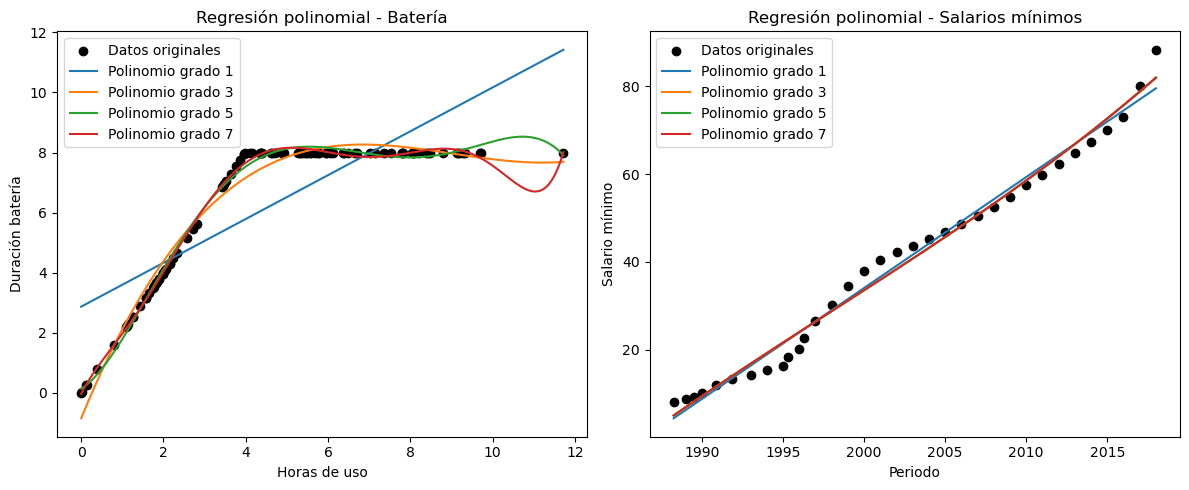

R2 para batería: [(1, 0.6872269726243967), (3, 0.9780671146743033), (5, 0.9953630126134434), (7, 0.9980965602454178)]
R2 para salarios: [(1, 0.98445666630952), (3, 0.9857366949442944), (5, 0.9857546631357292), (7, 0.9857730993939066)]


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

# Regresiones polinomiales para batería
orders = [1, 3, 5, 7]
r2_bat = []
models_bat = []
x_plot_bat = np.linspace(x_bat.min(), x_bat.max(), 200).reshape(-1, 1)

for order in orders:
    poly = PolynomialFeatures(degree=order)
    X_poly = poly.fit_transform(x_bat)
    model = LinearRegression().fit(X_poly, y_bat)
    r2 = model.score(X_poly, y_bat)
    r2_bat.append((order, r2))
    models_bat.append((poly, model))

# Regresiones polinomiales para salarios
r2_sal = []
models_sal = []
x_plot_sal = np.linspace(x_sal.min(), x_sal.max(), 200).reshape(-1, 1)

for order in orders:
    poly = PolynomialFeatures(degree=order)
    X_poly = poly.fit_transform(x_sal)
    model = LinearRegression().fit(X_poly, y_sal)
    r2 = model.score(X_poly, y_sal)
    r2_sal.append((order, r2))
    models_sal.append((poly, model))

# Gráfica para batería
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_bat, y_bat, color='black', label='Datos originales')
for (poly, model), order in zip(models_bat, orders):
    y_plot = model.predict(poly.transform(x_plot_bat))
    plt.plot(x_plot_bat, y_plot, label=f'Polinomio grado {order}')
plt.title('Regresión polinomial - Batería')
plt.xlabel('Horas de uso')
plt.ylabel('Duración batería')
plt.legend()

# Gráfica para salarios
plt.subplot(1, 2, 2)
plt.scatter(x_sal, y_sal, color='black', label='Datos originales')
for (poly, model), order in zip(models_sal, orders):
    y_plot = model.predict(poly.transform(x_plot_sal))
    plt.plot(x_plot_sal, y_plot, label=f'Polinomio grado {order}')
plt.title('Regresión polinomial - Salarios mínimos')
plt.xlabel('Periodo')
plt.ylabel('Salario mínimo')
plt.legend()
plt.tight_layout()
plt.show()

# Comparación de R2
print("R2 para batería:", r2_bat)
print("R2 para salarios:", r2_sal)

# Regresion polinomial

# CODIGOS A MANO CON CONOCIMIENTO DE CLASE

# DATA DE BATERIA

REGRESION POLINOMIAL BATERIA

In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


salarios = pd.read_csv('Salarios_minimos.csv')
bateria = pd.read_csv('bateria_tableta.txt')

In [61]:
x = salarios[['Periodo']]
y = salarios[['Salario']]

LR = LinearRegression()
LR.fit(x, y)

LR.intercept_


array([-5022.60217164])

# Regresion orden 1,3,5,7

In [62]:
salarios.head()


,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


# ORDEN 1

In [63]:
x = salarios[['Periodo']]
y = salarios[['Salario']]

LRs = LinearRegression()
LRs.fit(x, y)




LinearRegression()

In [64]:
LRs.intercept_


array([-5022.60217164])

In [65]:
LRs.coef_

array([[2.52832885]])

# Ordenes faltantes 3,5,7

In [66]:
x= np.hstack([x, x**2,x**3, x**4, x**5, x**6,x**7])

LRs = LinearRegression()
LRs.fit(x,y)

LRs.intercept_


array([-156804.779572])

In [67]:
LRs.coef_

array([[ 1.91160388e-23, -7.36764978e-19,  9.20293587e-17,
         1.22888842e-13,  1.02560834e-10, -8.54813518e-14,
         1.83257513e-17]])

# Bateria data

In [68]:
bateria.head()

,carga,duracion
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


# Primer orden BATERIA

In [72]:
x1 = bateria[['carga']]
y1 = bateria[['duracion']]

LRb = LinearRegression()
LRb.fit(x1, y1)

LRb.intercept_

array([2.87054111])

# Ordenes que siguen 3,5,7

In [73]:
x1 = np.hstack([x1, x1**2, x1**3, x1**4, x1**5, x1**6, x1**7])

LRb = LinearRegression()
LRb.fit(x1, y1)

LRb.intercept_

array([-0.02673001])

In [74]:
LRb.coef_

array([[ 2.63586646e+00, -1.38252388e+00,  1.01240187e+00,
        -3.16715233e-01,  4.60134802e-02, -3.15491538e-03,
         8.27801489e-05]])

# Comparar el R2 de cada modelo

In [ ]:
# comparar el r2 de ambos modelos, score determina los calculos del r2
r2=LRs.score(x,y)
print("el coefficient de determinacion R2 del modelo de salarios es:", r2)

r2b=LRb.score(x1,y1)
print("el coefficient de determinacion R2 del modelo de bateria es:", r2b)

el coefficient de determinacion R2 del modelo de salarios es: 0.9857730993924336
el coefficient de determinacion R2 del modelo de bateria es: 0.9980965602454173


# Grafico de dispersion datos originales y los modelos creados

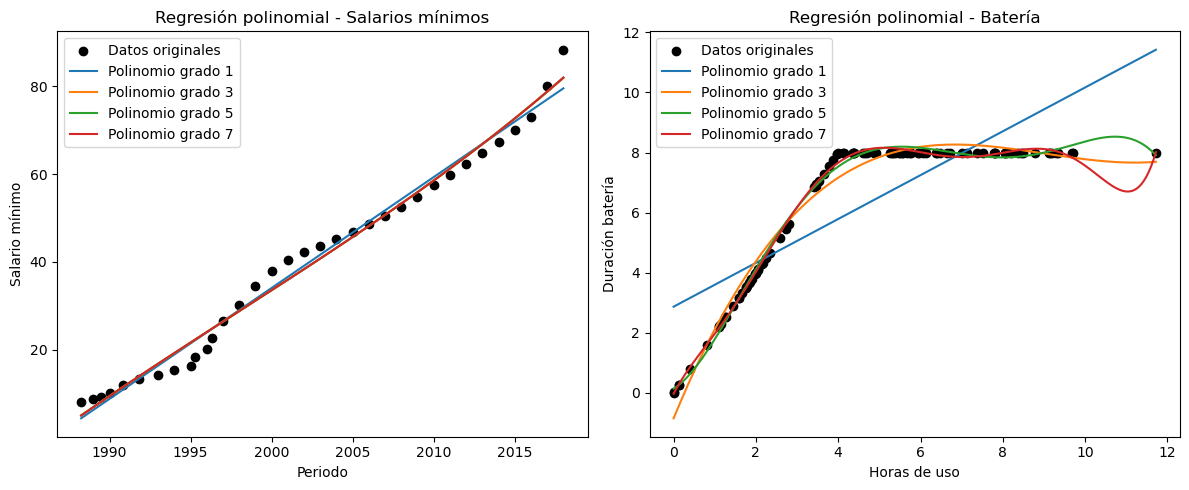

In [76]:
degrees = [1, 3, 5, 7]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_sal, y_sal, color='black', label='Datos originales')
for (poly, model), order in zip(models_sal, orders):
    y_plot = model.predict(poly.transform(x_plot_sal))
    plt.plot(x_plot_sal, y_plot, label=f'Polinomio grado {order}')  
plt.title('Regresión polinomial - Salarios mínimos')
plt.xlabel('Periodo')
plt.ylabel('Salario mínimo')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_bat, y_bat, color='black', label='Datos originales')
for (poly, model), order in zip(models_bat, orders):
    y_plot = model.predict(poly.transform(x_plot_bat))
    plt.plot(x_plot_bat, y_plot, label=f'Polinomio grado {order}')
plt.title('Regresión polinomial - Batería')
plt.xlabel('Horas de uso')
plt.ylabel('Duración batería')
plt.legend()
plt.tight_layout()
plt.show()
